# 第4章　構文木とPegTree



## PegTree の利用

In [ ]:
!pip install pegtree

     |████████████████████████████████| 159 kB 6.2 MB/s 


In [ ]:
import pegtree as pg
from pegtree.colab import peg, pegtree, pasm, jsonfy, jsontree


## p.47

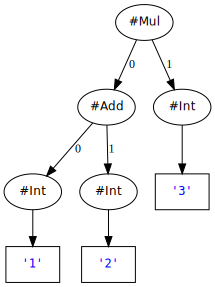

In [ ]:
%%peg

Expr = { Prod "+" Expr #Add } / Prod
Prod = { Term "*" Term #Mul } / Term
Term = Int / "(" Expr ")"
Int = { [0-9]+ #Int }

example Expr (1+2)*3@


# 4.2 構文木アノテーション

p.49 

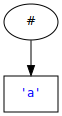

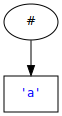

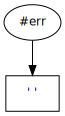

In [ ]:
%%peg

A = 'a'

example A a
example A ab
example A b

### 4.2.3 構文木アノテーション

p.50 図4.2

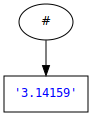

In [ ]:
%%peg

REAL =  DIGIT* '.' DIGIT+    
DIGIT = [0-9]

example REAL 3.14159

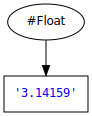

In [ ]:
%%peg

Real = { REAL #Float }
REAL = DIGIT* '.' DIGIT+ 
DIGIT = [0-9]

example Real 3.14159

### 構文木と子ノード

p. 51

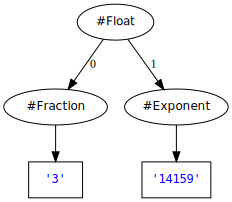

In [ ]:
%%peg

Real = { 
    {DIGIT* #Fraction } 
     '.' 
    {DIGIT+ #Exponent } 
    #Float 
} 
DIGIT = [0-9]

example Real 3.14159

### 4.2.5 子ノードへのラベル (p.52)

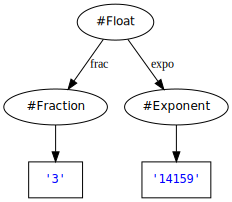

In [ ]:
%%peg

Real = { 
    frac: {DIGIT* #Fraction } 
     '.' 
    expo: {DIGIT+ #Exponent } 
    #Float 
} 
DIGIT = [0-9]

example Real 3.14159

### 繰り返しとリスト

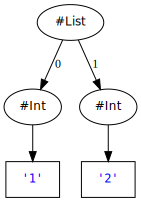

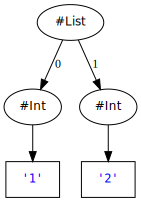

In [ ]:
%%peg

Data = { Int _ Int #List }
Int = {  DIGIT+ #Int }
DIGIT = [0-9]
_ = [ \t]+  // 空白

example Data 1 2 3
example Data 1 2 3 4


### 4.3.1 リストとペア

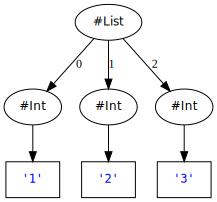

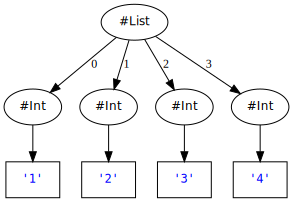

In [ ]:
%%peg

Data = { Int (_ Int)* #List }
Int = {  DIGIT+ #Int }
DIGIT = [0-9]
_ = [ \t]+  // 空白

example Data 1 2 3
example Data 1 2 3 4


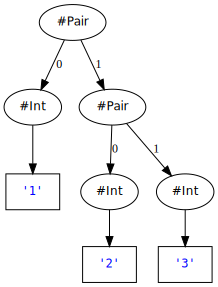

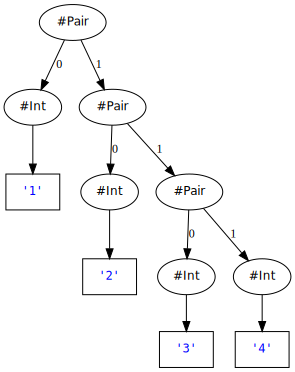

In [ ]:
%%peg

Data = { Int _ (Data / Int) #Pair }
Int = {  DIGIT+ #Int }
DIGIT = [0-9]
_ = [ \t]+  // 空白

example Data 1 2 3
example Data 1 2 3 4


### フォルド

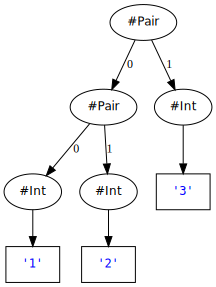

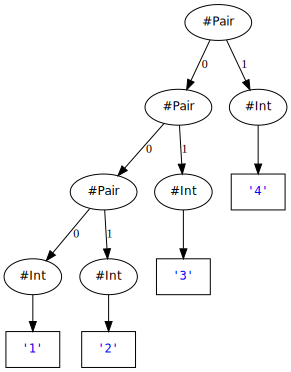

In [ ]:
%%peg

Data = Int {^ _ Int #Pair }*
Int = {  DIGIT+ #Int }
DIGIT = [0-9]
_ = [ \t]+  // 空白

example Data 1 2 3
example Data 1 2 3 4


# 4.3 情報抽出

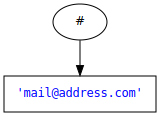

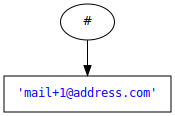

wrote email.pegtree


In [ ]:
%%peg email.pegtree

EMAIL = LOCAL '@' DOMAIN
LOCAL = [a-zA-Z0-9.!#$%&'*+/=?^_`{|}~\-]+
DOMAIN = SUBDOMAIN ('.' SUBDOMAIN)+
SUBDOMAIN = [a-zA-Z0-9\-]+

example EMAIL mail@address.com
example EMAIL mail+1@address.com


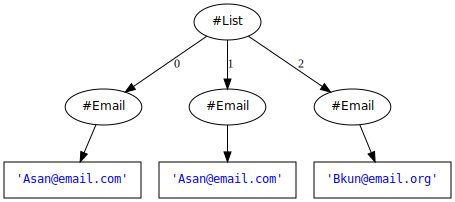

wrote email.pegtree


In [ ]:
%%peg email.pegtree

EmailList = { (Email / .)* #List }

Email = { EMAIL #Email }

EMAIL = LOCAL '@' DOMAIN
LOCAL = [a-zA-Z0-9.!#$%&'*+/=?^_`{|}~\-]+
DOMAIN = SUBDOMAIN ('.' SUBDOMAIN)+
SUBDOMAIN = [a-zA-Z0-9\-]+

example EmailList '''
Return-Path: <Asan@email.com>
Authentication-Results: ***; spf=pass smtp.mailfrom=****; dkim=none
Received: from example1.ne.jp by example2.ne.jp ; Tue, 14 Sep 2016 15:16:38 JST
Date: Tue, 14 Sep 2016 15:16:37 +0900 (JST)
From: Aさん<Asan@email.com>
To: Bくん<Bkun@email.org>
Subject: こんにちは
MIME-Version: 1.0
Content-Type: text/plain; charset=iso-2022-jp
'''


[#List [#Email 'Asan@email.com'][#Email 'Asan@email.com'][#Email 'Bkun@email.org']]


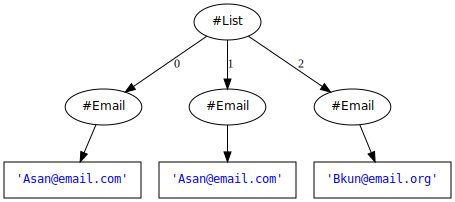

In [ ]:
%%pegtree email.pegtree

Return-Path: <Asan@email.com>
Authentication-Results: ***; spf=pass smtp.mailfrom=****; dkim=none
Received: from example1.ne.jp by example2.ne.jp ; Tue, 14 Sep 2016 15:16:38 JST
Date: Tue, 14 Sep 2016 15:16:37 +0900 (JST)
From: Aさん<Asan@email.com>
To: Bくん<Bkun@email.org>
Subject: こんにちは
MIME-Version: 1.0
Content-Type: text/plain; charset=iso-2022-jp

In [ ]:
%%jsonfy email.pegtree

Return-Path: <Asan@email.com>
Authentication-Results: ***; spf=pass smtp.mailfrom=****; dkim=none
Received: from example1.ne.jp by example2.ne.jp ; Tue, 14 Sep 2016 15:16:38 JST
Date: Tue, 14 Sep 2016 15:16:37 +0900 (JST)
From: Aさん<Asan@email.com>
To: Bくん<Bkun@email.org>
Subject: こんにちは
MIME-Version: 1.0
Content-Type: text/plain; charset=iso-2022-jp


["Asan@email.com", "Asan@email.com", "Bkun@email.org"]


In [ ]:
%%jsontree email.pegtree
Return-Path: <Asan@email.com>
Authentication-Results: ***; spf=pass smtp.mailfrom=****; dkim=none
Received: from example1.ne.jp by example2.ne.jp ; Tue, 14 Sep 2016 15:16:38 JST
Date: Tue, 14 Sep 2016 15:16:37 +0900 (JST)
From: Aさん<Asan@email.com>
To: Bくん<Bkun@email.org>
Subject: こんにちは
MIME-Version: 1.0
Content-Type: text/plain; charset=iso-2022-jp

[["Asan@email.com", "#Email", 14, 28], ["Asan@email.com", "#Email", 232, 246], ["Bkun@email.org", "#Email", 256, 270], "#List"]


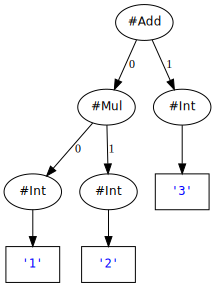

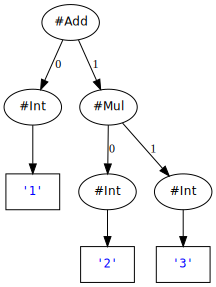

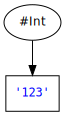

In [ ]:
%pegtree math.pegtree

# 5.2 数式の構文木

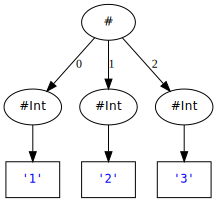

In [ ]:
%%peg
Expr = Prod ("+" Prod)*
Prod = Value ("*" Value)*
Value = { [0-9]+ #Int } _
example Expr 1+2+3


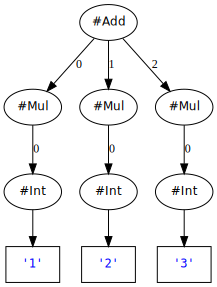

In [ ]:
%%peg
Expr = { Prod ("+" Prod)* #Add }
Prod = { Value ("*" Value)* #Mul }
Value = { [0-9]+ #Int } _
example Expr 1+2+3


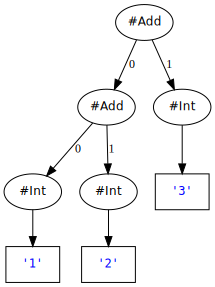

In [ ]:
%%peg

Expr = Prod ({^ '+' Prod #Add})*
Prod = Value {^ '*' Value #Mul}*
Value = { [0-9]+ #Int} _

example Expr 1+2+3

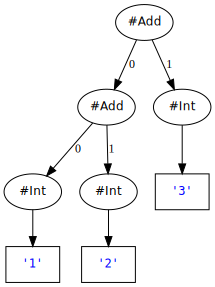

In [ ]:
%%peg

Expr = Prod ({^ "+" Prod #Add })*
Prod = Value {^ "*" Value #Mul }* 
Value = { [0-9]+ #Int }
       
example Expr 1+2+3

In [ ]:
from pegtree.colab import pasm
%pasm math.tpeg

pRule(peg,"Int",pNode(pOneMany(pRange("","09")),"Int",0))
pRule(peg,"Value",pOre2(pRef(peg,"Int"),pSeq3(pChar("("),pRef(peg,"Expression"),pChar(")"))))
pRule(peg,"Expression",pSeq2(pRef(peg,"Product"),pMany(pOre2(pSeq2(pChar("+"),pFold("",pRef(peg,"Product"),"Add",-1)),pSeq2(pChar("-"),pFold("",pRef(peg,"Product"),"Sub",-1))))))
pRule(peg,"Product",pSeq2(pRef(peg,"Value"),pMany(pOre2(pSeq2(pChar("*"),pFold("",pRef(peg,"Product"),"Mul",-1)),pSeq2(pChar("/"),pFold("",pRef(peg,"Product"),"Div",-1))))))


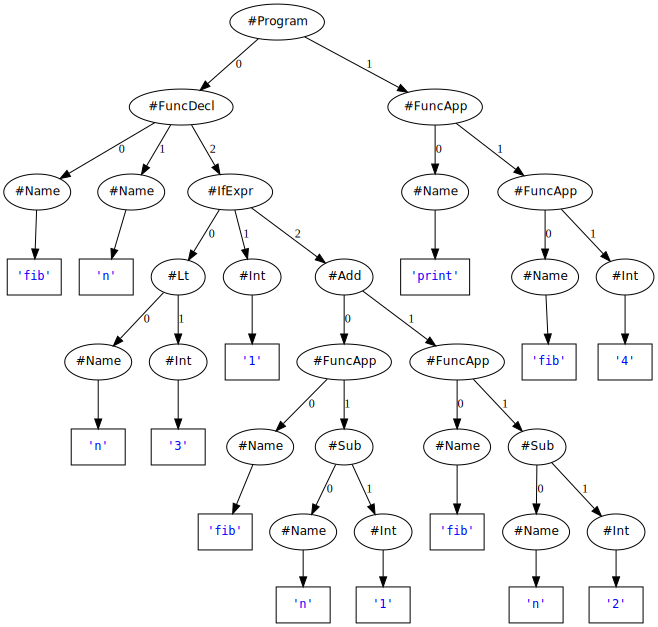

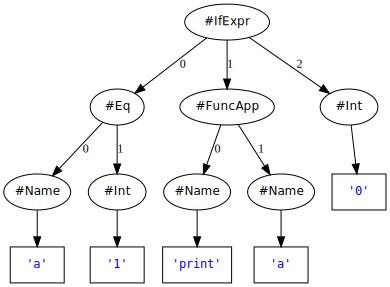

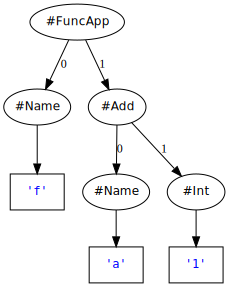

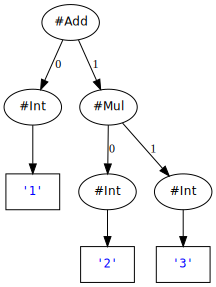

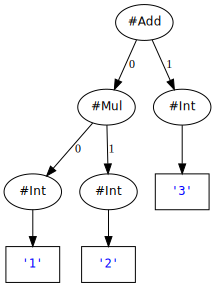

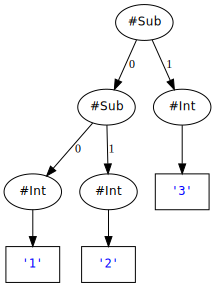

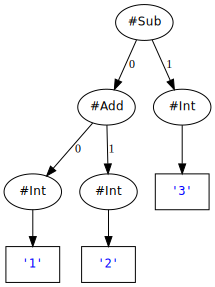

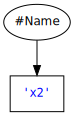

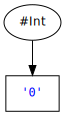

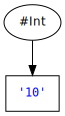

In [ ]:
%pegtree chibi.pegtree

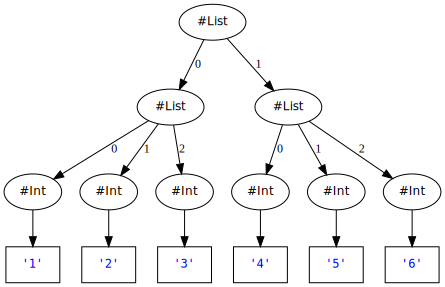

In [ ]:
%%peg

CSVFile = { Line (LF Line)* #List }
Line = { Value (',' _ Value)* #List }
LF = '\r'? '\n'  // 改行
_ = [ \t]*  // 空白

Value = Int 
Int = {  [0-9]+ #Int }

example CSVFile '''
1,2,3
4,5,6
'''


# 追加 (p. 54)

In [ ]:
!pip install pegtree
import pegtree as pg
from pegtree.colab import peg, pegtree, pasm, jsonfy, jsontree


     |████████████████████████████████| 159 kB 5.2 MB/s 


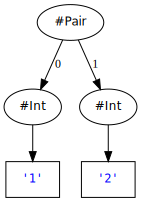

In [ ]:
%%peg

Data = { Int _ (Data / Int) #Pair }
Int = { DIGIT #Int }
DIGIT = [0-9]

example Data 1 2

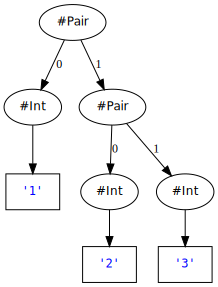

In [ ]:
%%peg

Data = { Int _ (Data / Int) #Pair }
Int = { DIGIT #Int }
DIGIT = [0-9]

example Data 1 2 3